In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tools.label_extract import read_extracted_labels, labels_to_df, labels_to_simple_df, df_labels_to_point_list
from defs.storage_locs import extracted_image_path, extracted_label_path
from court_segment.plot_court_labels import plot_labels
from tools.visualization import plot_image

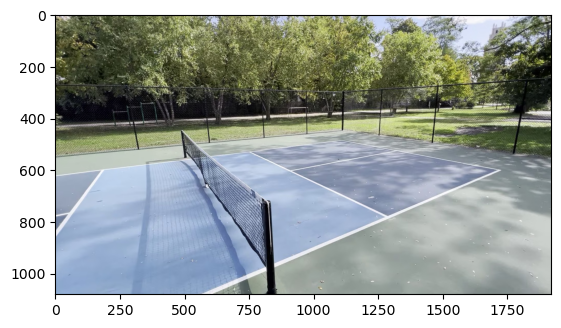

In [2]:
sample_img = cv2.imread(extracted_image_path('center_right_1', 0))
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)
plt.imshow(sample_img)

In [3]:
from tools.data_loading import POINT_LABELS
sample_labels = read_extracted_labels(extracted_label_path('center_right_1'))
sample_np = labels_to_simple_df(sample_labels)
# '0'][POINT_LABELS])
X = sample_img
y = sample_np[sample_np.index == '0'][POINT_LABELS]

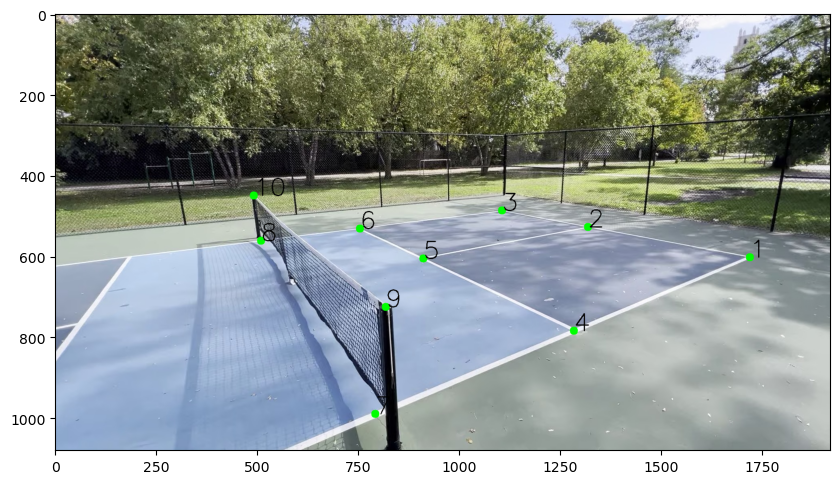

In [4]:
def group_points_by_2(points):
    # create list of points grouped by 2
    grouped_points = []
    for i in range(0, len(points), 2):
        grouped_points.append(points[i:i+2])
    return grouped_points
labels = group_points_by_2(y.values[0])
plot_image(plot_labels(X, labels))

# Translating
move the image and move the labels accordingly

In [5]:
y

1_x     1_y      2_x     2_y     3_x     3_y      4_x    4_y     5_x  \
0  1721.35  602.89  1320.23  527.85  1107.6  486.68  1285.09  784.6  912.77   

      5_y    6_x     6_y     7_x     7_y    8_x     8_y     9_x     9_y  \
0  605.98  755.9  531.67  793.75  990.55  510.1  561.47  819.12  725.25   

     10_x    10_y  
0  492.17  449.73

In [6]:
labels

[array([1721.35, 602.89], dtype=object),
 array([1320.23, 527.85], dtype=object),
 array([1107.6, 486.68], dtype=object),
 array([1285.09, 784.6], dtype=object),
 array([912.77, 605.98], dtype=object),
 array([755.9, 531.67], dtype=object),
 array([793.75, 990.55], dtype=object),
 array([510.1, 561.47], dtype=object),
 array([819.12, 725.25], dtype=object),
 array([492.17, 449.73], dtype=object)]

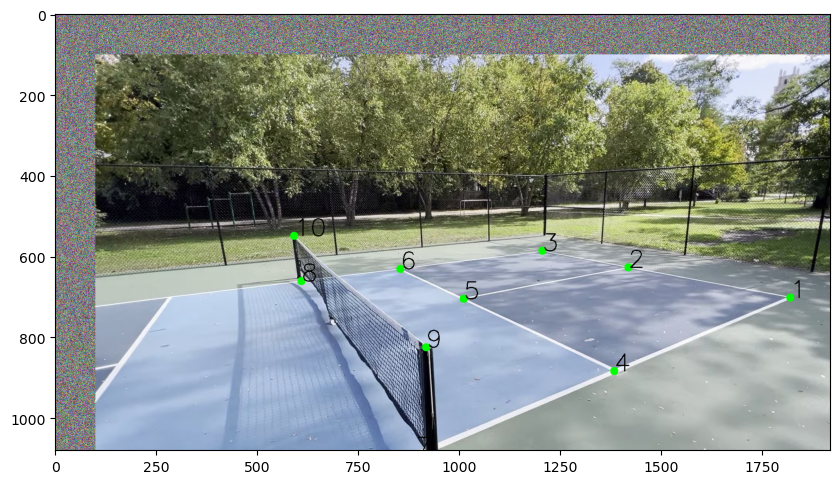

In [7]:
dx = 100
dy = 100
# Translate X
M = np.float32([[1,0,dx],[0,1,dy]])
rows, cols, _ = X.shape
X_translated = cv2.warpAffine(X,M,(cols,rows))
# fill in the empty space created from shifting with random noise
white = np.ones((rows, cols, 3), dtype=np.uint8) * 1
mask = 1 - cv2.warpAffine(white,M,(cols,rows))
# generate random noise for the mask
noise = mask * np.random.randint(0, 255, (rows, cols, 3))
X_translated = X_translated + noise

# Translate y by dx, dy by applying perspective transform
y_labels = group_points_by_2(y.values[0])
new_labels = []
for l in y_labels:
    # convert to vector to multiply
    l = np.array(l)
    l = np.append(l, 1)
    l = M @ l.T
    # convert back to list
    l = l.tolist()
    new_labels.append(l)
y_translated = new_labels

# y_translated
plot_image(plot_labels(X_translated, y_translated))

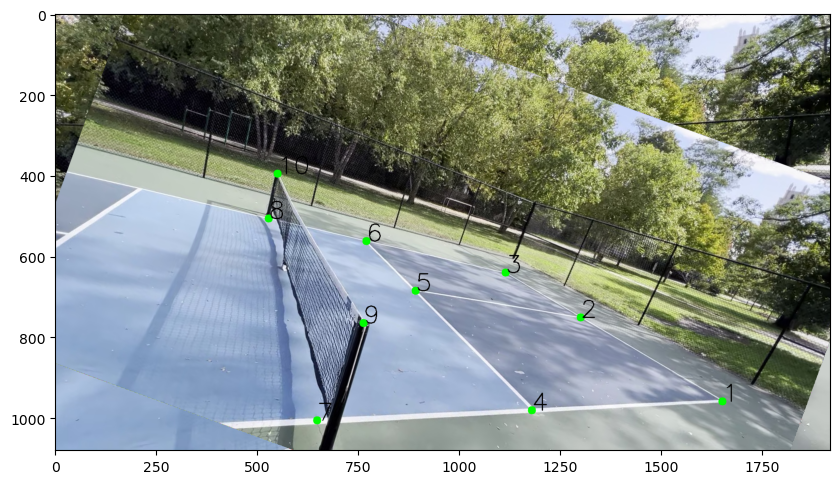

In [8]:
# now do it with rotation of angle theta
theta = 20
theta = theta/180*np.pi
rows, cols, _ = X.shape
dx = 0
dy = 100
# compute adjustment to center image after rotation
center_dx = (cols/2) * (1 - np.cos(theta)) + (rows/2) * np.sin(theta)
center_dy = (rows/2) * (1 - np.cos(theta)) - (cols/2) * np.sin(theta)
dx = dx + center_dx
dy = dy + center_dy
M = np.float32([[np.cos(theta),-np.sin(theta),dx],[np.sin(theta),np.cos(theta),dy]])
X_translated = cv2.warpAffine(X,M,(cols,rows))
# fill in the empty space created from shifting with random noise
white = np.ones((rows, cols, 3), dtype=np.uint8) * 1
mask = 1 - cv2.warpAffine(white,M,(cols,rows))
# generate random noise for the mask
noise = mask * np.random.randint(0, 255, (rows, cols, 3))
X_translated = X_translated + X * mask

# Translate y by dx, dy by applying perspective transform
y_labels = group_points_by_2(y.values[0])
new_labels = []
for l in y_labels:
    # convert to vector to multiply
    l = np.array(l)
    l = np.append(l, 1)
    l = M @ l.T
    # convert back to list
    l = l.tolist()
    new_labels.append(l)
y_translated = new_labels

# y_translated
plot_image(plot_labels(X_translated, y_translated))

# Test Code


In [9]:
from tools.data_loading import read_data_to_numpy
from tools.augment_images import apply_random_affine
import numpy as np
from court_segment.plot_court_labels import plot_random_labeled_image

In [10]:
(X, y) = read_data_to_numpy('center_left_1')

In [11]:
(X_new, y_new) = apply_random_affine(X, y, 2)

In [12]:
np.concatenate([X,X], axis=0) == X_new

array([[[[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        ...,

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True],
         [ True,  True,  True],
         ...,
         [ True,  True,  True],
         [ T

In [13]:
X.shape

(98, 1080, 1920, 3)

In [14]:
X_new.shape

(196, 1080, 1920, 3)

In [15]:
X_new, y_new = apply_random_affine(X, y, 1, (-15, 15), ((-20, 20), (-10, 10)))

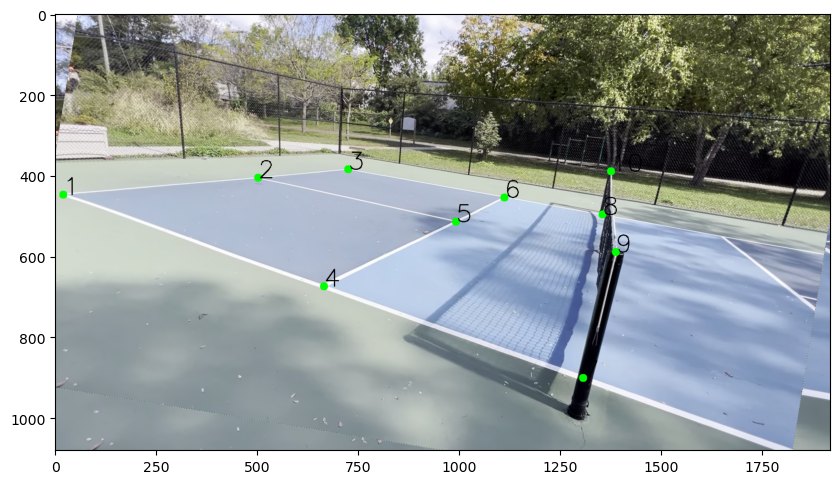

In [16]:
plot_random_labeled_image(X_new, y_new)

In [17]:
from tools.augment_images import apply_random_affine_and_flip

In [18]:
(X_new, y_new) = apply_random_affine_and_flip(X, y, 1, (-20, 20), ((-100, 100), (-50, 50)))

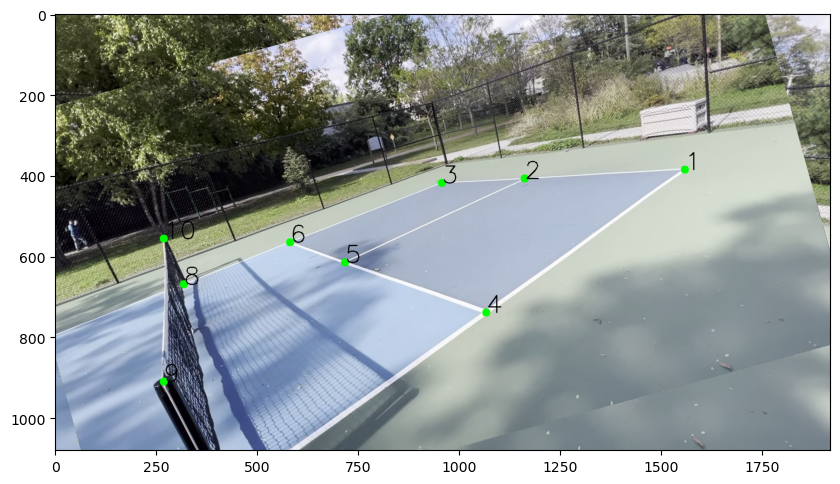

In [19]:
plot_random_labeled_image(X_new, y_new)

In [20]:
import pandas as pd

In [21]:
a = pd.DataFrame(y_new, columns=POINT_LABELS)
a["hello"] = range(len(y_new))
a.to_json('test.json', orient='records')

In [22]:
pd.read_json('test.json', orient='records')

1_x         1_y          2_x         2_y          3_x         3_y  \
0   1487.812267  597.309889  1148.824260  471.749275   952.916106  397.069149   
1    390.530232  333.758440   754.175786  376.891933   962.977541  399.066626   
2   1580.331455  342.962951  1219.011518  396.339190  1010.974504  424.808226   
3   1561.746277  398.989220  1201.190280  376.282850   989.312188  361.052314   
4    447.585183  633.466500   785.805010  520.561612   988.367135  451.206453   
..          ...         ...          ...         ...          ...         ...   
93  1665.362575  646.694467  1310.962157  486.587631  1113.118928  395.281046   
94   258.194104  388.084161   648.577103  359.948617   864.980320  343.721325   
95   416.925625  588.545203   770.227136  425.128492   967.389609  332.859009   
96  1666.907906  498.167256  1283.692498  427.024666  1070.124566  385.059328   
97   334.754917  506.000314   684.879622  432.838543   892.069736  388.537636   

            4_x         4_y          5_x         5_y  ...         6_y  \
0   1091.127590  727.778696   734.548100  488.696499  ...  380.225125   
1    689.481921  631.660335  1113.425470  578.470651  ...  554.787130   
2   1291.502581  646.717142   865.543002  610.083046  ...  591.476418   
3   1216.874050  637.025377   808.146471  511.593331  ...  454.202480   
4    839.449437  773.428011  1199.950718  550.666635  ...  447.141073   
..          ...         ...          ...         ...  ...         ...   
93  1146.606599  788.548371   830.348355  486.965717  ...  361.294451   
94   695.973392  701.210727  1096.175502  527.533887  ...  454.721110   
95   938.972612  722.720742  1251.203330  421.304158  ...  293.569844   
96  1192.815741  750.324425   816.945735  537.121647  ...  446.536788   
97   705.310232  696.422818  1089.734152  513.067306  ...  427.561734   

            7_x          7_y          8_x         8_y          9_x  \
0    573.290575   893.930005   288.577815  368.953130   660.222457   
1   1069.416152  1011.186472  1568.395297  673.704052  1121.618004   
2    923.063215  1039.853215   414.121855  717.590524   859.988940   
3    769.544799   944.329259   345.316205  525.198828   770.934567   
4   1343.347849   956.828734  1655.221858  445.222525  1271.071173   
..          ...          ...          ...         ...          ...   
93   395.033444   993.923853   389.539003  336.027724   384.902196   
94  1327.012829  1144.959810  1564.055421  539.611279  1440.387293   
95  1683.864568   915.458303  1692.590109  265.657435  1695.727624   
96   510.338715  1113.076907   352.444186  494.934729   422.028057   
97  1186.947057   937.175781  1554.331497  456.935618  1145.833765   

           9_y         10_x        10_y  hello  
0   623.014938   283.094155  236.971340      0  
1   728.095646  1632.064554  558.692657      1  
2   757.299169   345.214094  607.332422      2  
3   652.563245   297.992897  400.369367      3  
4   677.069895  1669.272038  310.904600      4  
..         ...          ...         ...    ...  
93  692.156390   383.848034  197.538840     93  
94  871.479646  1617.517820  411.731139     94  
95  615.504862  1698.366946  124.125724     95  
96  814.677328   309.930206  357.769908     96  
97  650.662375  1574.365377  334.844152     97  

[98 rows x 21 columns]

In [23]:
from tools.data_loading import numpy_to_images_labels

In [24]:
len(X_new)

98

In [25]:
pd.DataFrame(y_new, columns=POINT_LABELS)

1_x         1_y          2_x         2_y          3_x         3_y  \
0   1487.812267  597.309889  1148.824260  471.749275   952.916106  397.069149   
1    390.530232  333.758440   754.175786  376.891933   962.977541  399.066626   
2   1580.331455  342.962951  1219.011518  396.339190  1010.974504  424.808226   
3   1561.746277  398.989220  1201.190280  376.282850   989.312188  361.052314   
4    447.585183  633.466500   785.805010  520.561612   988.367135  451.206453   
..          ...         ...          ...         ...          ...         ...   
93  1665.362575  646.694467  1310.962157  486.587631  1113.118928  395.281046   
94   258.194104  388.084161   648.577103  359.948617   864.980320  343.721325   
95   416.925625  588.545203   770.227136  425.128492   967.389609  332.859009   
96  1666.907906  498.167256  1283.692498  427.024666  1070.124566  385.059328   
97   334.754917  506.000314   684.879622  432.838543   892.069736  388.537636   

            4_x         4_y          5_x         5_y          6_x         6_y  \
0   1091.127590  727.778696   734.548100  488.696499   576.283160  380.225125   
1    689.481921  631.660335  1113.425470  578.470651  1306.216416  554.787130   
2   1291.502581  646.717142   865.543002  610.083046   673.444037  591.476418   
3   1216.874050  637.025377   808.146471  511.593331   624.093307  454.202480   
4    839.449437  773.428011  1199.950718  550.666635  1365.645989  447.141073   
..          ...         ...          ...         ...          ...         ...   
93  1146.606599  788.548371   830.348355  486.965717   699.499754  361.294451   
94   695.973392  701.210727  1096.175502  527.533887  1263.868416  454.721110   
95   938.972612  722.720742  1251.203330  421.304158  1381.364512  293.569844   
96  1192.815741  750.324425   816.945735  537.121647   659.758005  446.536788   
97   705.310232  696.422818  1089.734152  513.067306  1266.365909  427.561734   

            7_x          7_y          8_x         8_y          9_x  \
0    573.290575   893.930005   288.577815  368.953130   660.222457   
1   1069.416152  1011.186472  1568.395297  673.704052  1121.618004   
2    923.063215  1039.853215   414.121855  717.590524   859.988940   
3    769.544799   944.329259   345.316205  525.198828   770.934567   
4   1343.347849   956.828734  1655.221858  445.222525  1271.071173   
..          ...          ...          ...         ...          ...   
93   395.033444   993.923853   389.539003  336.027724   384.902196   
94  1327.012829  1144.959810  1564.055421  539.611279  1440.387293   
95  1683.864568   915.458303  1692.590109  265.657435  1695.727624   
96   510.338715  1113.076907   352.444186  494.934729   422.028057   
97  1186.947057   937.175781  1554.331497  456.935618  1145.833765   

           9_y         10_x        10_y  
0   623.014938   283.094155  236.971340  
1   728.095646  1632.064554  558.692657  
2   757.299169   345.214094  607.332422  
3   652.563245   297.992897  400.369367  
4   677.069895  1669.272038  310.904600  
..         ...          ...         ...  
93  692.156390   383.848034  197.538840  
94  871.479646  1617.517820  411.731139  
95  615.504862  1698.366946  124.125724  
96  814.677328   309.930206  357.769908  
97  650.662375  1574.365377  334.844152  

[98 rows x 20 columns]

In [26]:
numpy_to_images_labels(X_new, y_new, 'test')

writing to /mnt/f/SeniorProject/data/custom/test


In [27]:
from defs.storage_locs import custom_label_path, custom_image_path

In [28]:
labels = pd.read_json(custom_label_path('test'), orient='records')
cv2.imread(custom_image_path('test', 0))

array([[[ 47,  72,  68],
        [ 48,  73,  69],
        [ 47,  72,  68],
        ...,
        [244, 236, 237],
        [244, 236, 237],
        [244, 236, 237]],

       [[ 48,  73,  69],
        [ 48,  73,  69],
        [ 48,  73,  69],
        ...,
        [244, 236, 237],
        [244, 236, 237],
        [244, 236, 237]],

       [[ 46,  71,  67],
        [ 46,  71,  67],
        [ 48,  73,  69],
        ...,
        [244, 236, 237],
        [243, 235, 236],
        [243, 235, 236]],

       ...,

       [[190, 147, 126],
        [190, 147, 126],
        [190, 147, 126],
        ...,
        [171, 164, 155],
        [171, 164, 155],
        [171, 164, 155]],

       [[190, 148, 125],
        [190, 148, 125],
        [190, 148, 125],
        ...,
        [171, 165, 154],
        [171, 165, 154],
        [171, 165, 154]],

       [[190, 148, 125],
        [190, 148, 125],
        [190, 148, 125],
        ...,
        [171, 165, 154],
        [171, 165, 154],
        [171, 165, 154]]

In [29]:
from tools.data_loading import load_numpy_data

In [30]:
X, y = load_numpy_data(['test'], '480x270', save=False)

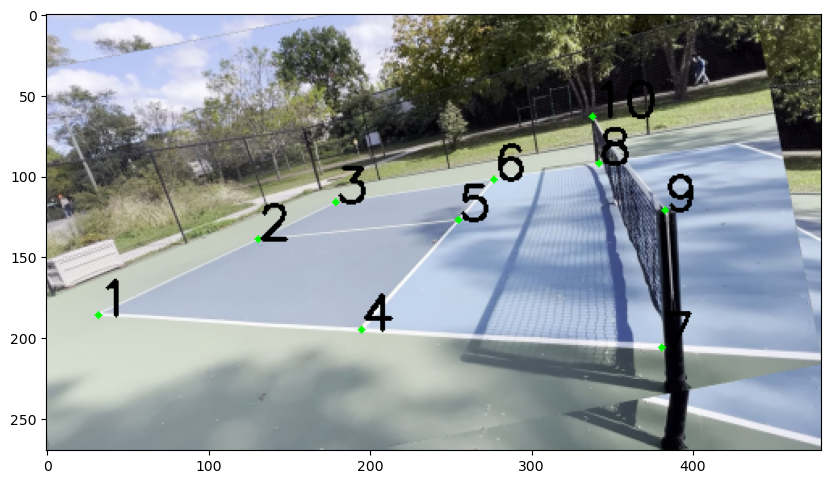

In [101]:
plot_random_labeled_image(X, y)

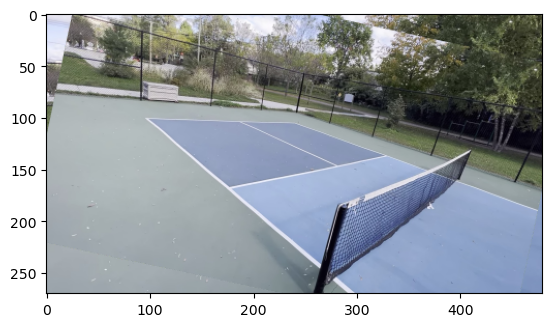

In [32]:
plt.imshow(X[0])

In [33]:
X, y = read_data_to_numpy('test', (480, 270), custom=True)

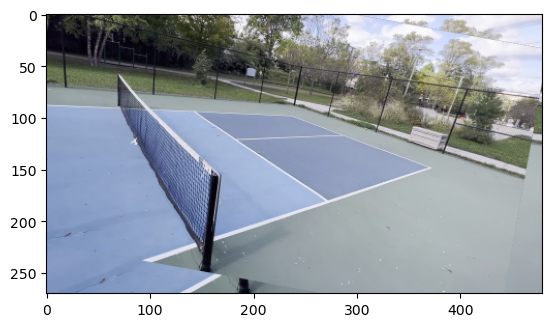

In [34]:
plt.imshow(X[0])